# Parte 1

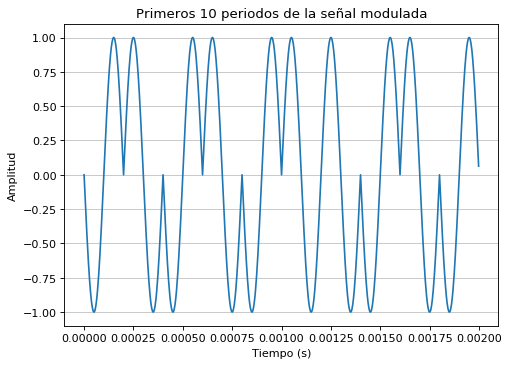

In [61]:
import numpy as np
from scipy import stats, signal, integrate
import matplotlib.pyplot as plt
import pandas as pd

fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')

df = pd.read_csv("bits10k.csv", header= None, prefix="data")
#print(df)

#num de bits
n = len(df) #################CORREGIR
 
#def frecuencia y periodo
f = 5000
t = 1/f
#print(n, f, t)

#Frecuencia de muestreo = frec de nyquist y puntos de muestra

p = 100
fs = p/t

# Vector de tiempo 
v_tiempo = np.linspace(0, n*t, n*p)


#Vector de tiempo para un periodo y forma de onda modulada
tp = np.linspace(0, t, p)
sinus = np.sin(2*np.pi * f * tp)

#Vector de ceros
senal = np.zeros(n*p)
onda = np.sin(2*np.pi*f*v_tiempo)

for k, b in enumerate(df['data0']):
    if b == 1:
        senal[k*p:(k+1)*p] = onda[k*p:(k+1)*p]
    else:
        senal[k*p:(k+1)*p] = -onda[k*p:(k+1)*p]
        
plt.plot(v_tiempo[0:1000], senal[0:1000])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Primeros 10 periodos de la señal modulada")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Parte 2: potencia promedio

In [62]:
#Calculamos la potencia instantanea por medio de una integral

Pi = senal**2
Pp = integrate.trapz(Pi, v_tiempo)/(n*t)
print("Potencia promedio de señal modulada: " + str(Pp))

Potencia promedio de señal modulada: 0.49999999999999983


# Partes 3, 4 y 5

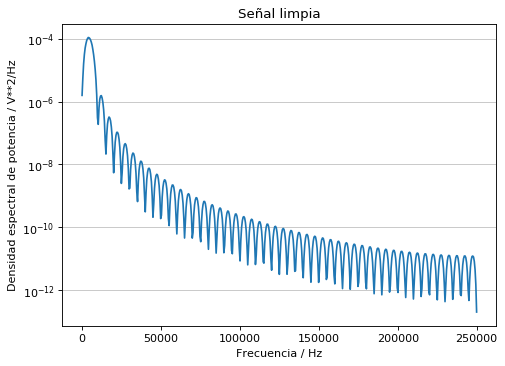

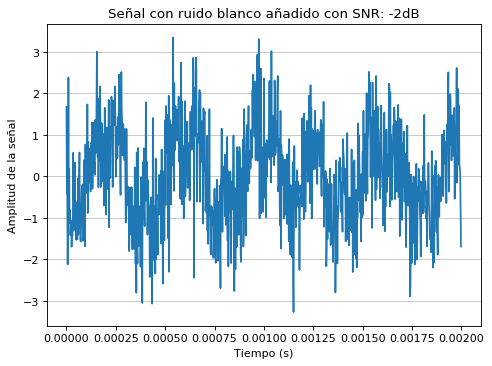

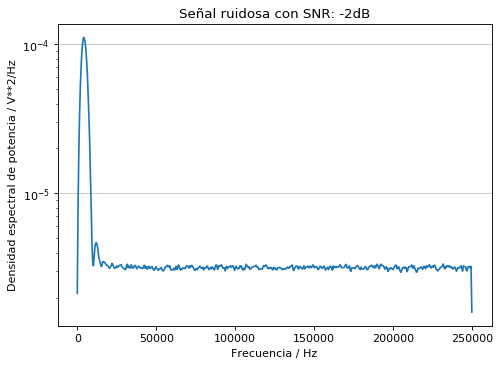

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


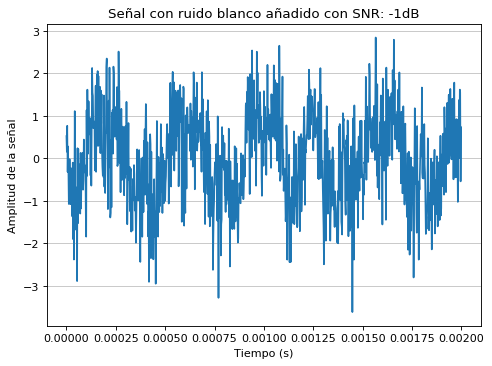

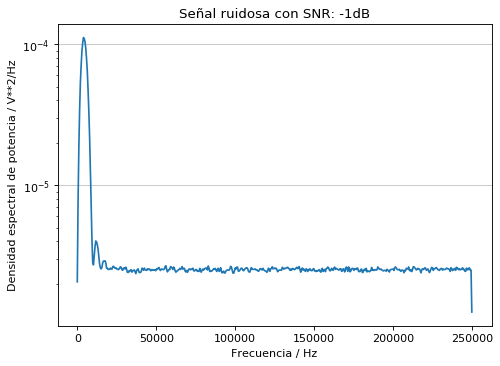

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


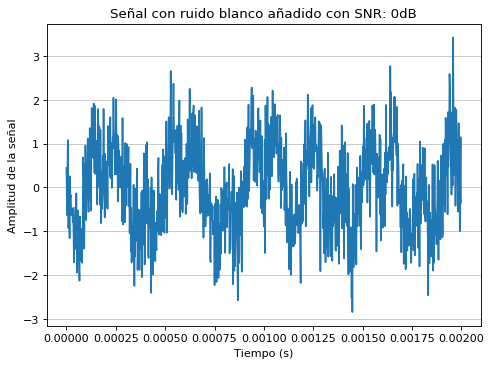

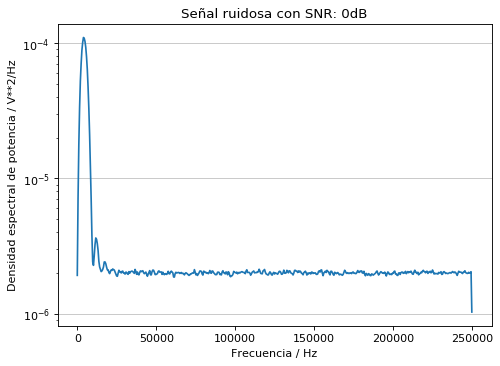

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


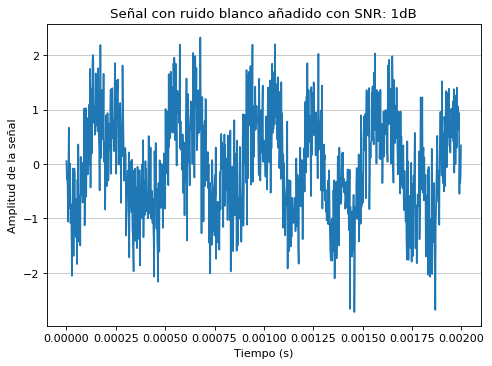

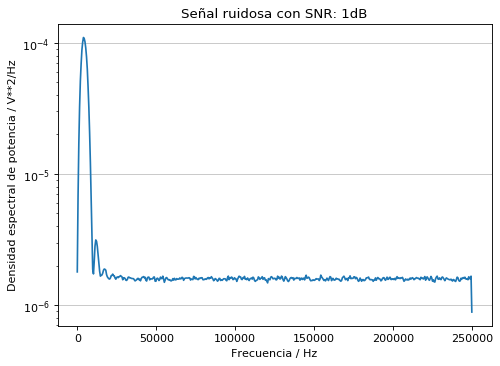

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


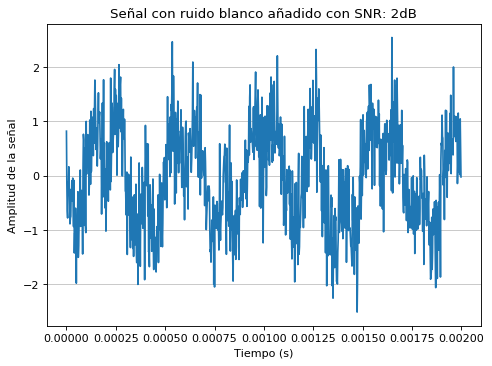

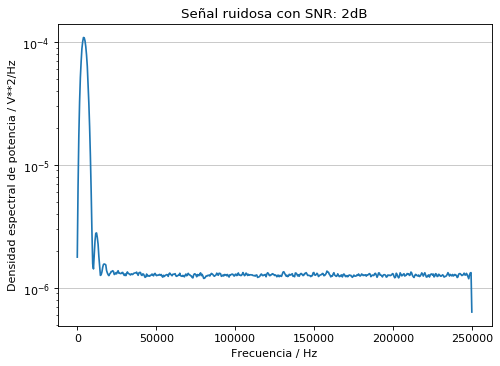

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


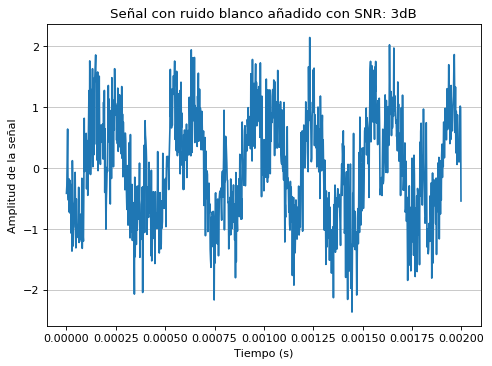

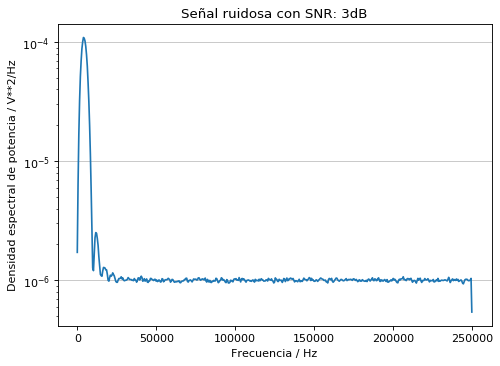

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


In [66]:
# Creamos una lista que alacernará los calores de error
BER_lista = []

#Usamos función welch
fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')
fw, PSD = signal.welch(senal, fs, nperseg=1024)
plt.semilogy(fw, PSD)
plt.title("Señal limpia")
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.grid(axis='y', alpha=0.75)
plt.show()

#Iteramos sobre el rango de ganancias del ruido, de modo que obtenemos todas las figuras y podemos obtener el
#BER en todas las ganancias
for SNR in range(-2, 4, 1):
    fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')
    
    #Calculamos la potencia del ruido
    Pn = Pp / (10**(SNR/10))
    
    #desvesta
    sigma = np.sqrt(Pn)
    
    #Ruido blanco
    ruido = np.random.normal(0, sigma, senal.shape)
    
    #Simulamos el canal de la señal
    Rx = senal+ruido
    plt.plot(v_tiempo[0:1000], Rx[0:1000])
    plt.title("Señal con ruido blanco añadido con SNR: " + str(SNR) + "dB")
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud de la señal')
    plt.grid(axis='y', alpha=0.75)
    plt.show

    
    fw, PSD = signal.welch(Rx, fs, nperseg=1024)
    fig=plt.figure(figsize=(7,5), dpi= 80, facecolor='w', edgecolor='k')
    plt.semilogy(fw, PSD)
    plt.title("Señal ruidosa con SNR: " + str(SNR) + "dB")
    plt.xlabel('Frecuencia / Hz')
    plt.ylabel('Densidad espectral de potencia / V**2/Hz')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    # Se calcula la energía de un periodo de onda
    Es = np.sum(onda[0:p]**2)


    # Inicialización del vector de bits recibidos
    bitsRx = np.zeros(df.shape)

    # Decodificación de la señal por detección de energía
    for k, b in enumerate(df['data0']):
        Ep = np.sum(Rx[k*p:(k+1)*p] * onda[k*p:(k+1)*p])
        if Ep > Es/2:
            bitsRx[k] = 1
        else:
            bitsRx[k] = 0

    err = np.sum(np.abs(df - bitsRx))
    BER = err/n
    BER_lista.append(BER)

    print(f'Hay un total de {err[0]} errores en {n} bits para una tasa de error de {BER[0]}.')

# Parte 6: Grafica BER vs SNR

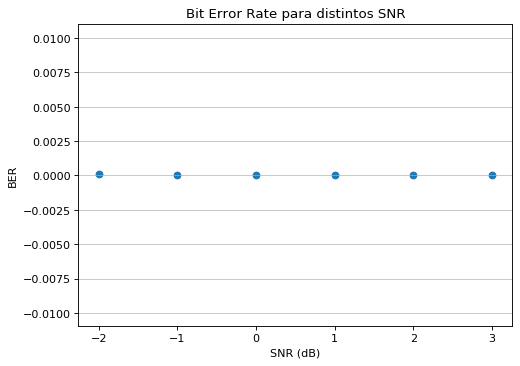

In [64]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
rangoSNR = [-2,-1,0,1,2,3]
plt.scatter(rangoSNR, BER_lista)
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.title("Bit Error Rate para distintos SNR")
plt.grid(axis='y', alpha=0.75)
plt.show()